In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random

rad_infc=6 #radio de infección
rec_time=1250 #Tiempo de recuperación 

# Caso 1. Expansión libre del virus

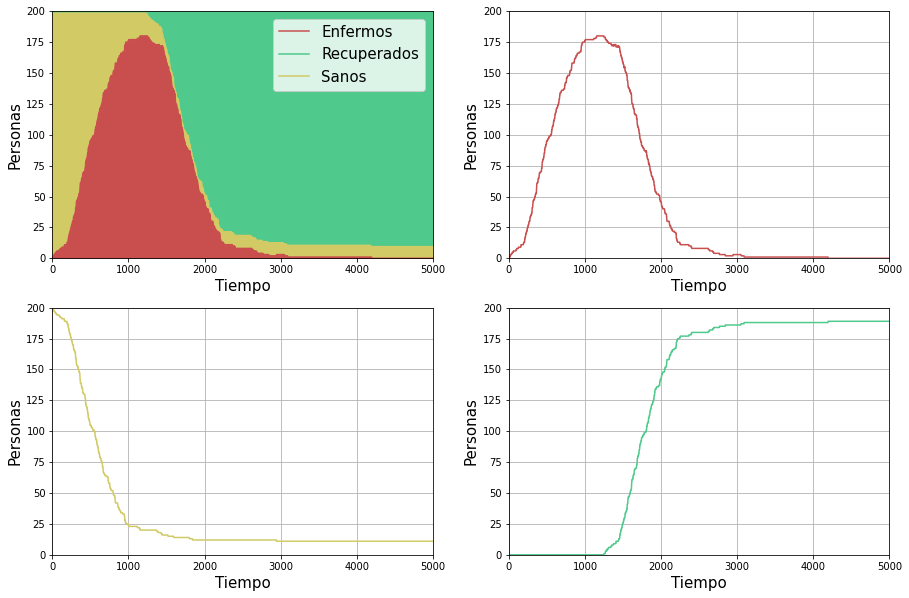

In [0]:
class Humans():
    def __init__(self,x,y,vx,vy,sick):
        self.X=x
        self.Y=y
        self.Vx=vx
        self.Vy=vy
        self.Sick=sick
        self.Time=[]
        self.Ims=[]
        self.Imr=[]
        self.Dgsa=[]
    #Evolucion de la posicion de los humanos
    def Pos_evol(self,t):
        self.X=self.X +self.Vx*t
        self.Y=self.Y +self.Vy*t
    #Cambio en la direccion de la velocidad en las paredes 
    def Vel_evol(self):
        if self.X<=-100 or self.X>=100 :
            self.Vx= -self.Vx
        if self.Y<=-100 or self.Y>=100 :
            self.Vy= -self.Vy
    def Sicks(self):
        if len(self.Ims)==0 and self.Sick==True:
            self.Ims.append(1)
    
    def Recovery(self):
        if len(self.Imr)==0 and self.Sick==False:
            self.Imr.append(1)
    
    #SickToHealth
    def STH(self):
        if self.Sick==True :
            self.Time.append(1)
            if len(self.Time)==rec_time :
                self.Sick=False
                self.Dgsa.append("I don't get sick again!")
    
        
#Creacion de humanos

H=[] #Lista con los humanos,las entradas son instancias de la clase.
H0=Humans(random.uniform(-100,100),random.uniform(-100,100),random.uniform(-5,5),random.uniform(-5,5),True) #Humano infectado el H0
H.append(H0)
for i in range(199):
    Hn=Humans(random.uniform(-100,100),random.uniform(-100,100),random.uniform(-5,5),random.uniform(-5,5),False)
    H.append(Hn)

#Datos a recopilar en la simulacion
Sicks=[] #Numero de humanos enfermos
Healthy=[] #Humanos que no se han enfermado
Recovery=[] #Humanos que se recuperan de la enfermedad

#Evolucion de la enfermedad en un año
time=[]
a=0 #Contador de enfermos
b=0 #Contador de recuperados
X0=[]
Y0=[]
X1=[]
Y1=[]
for j in range(5000):
    c=0 #CONTADOR DE PERSONAS SANAS
    time.append(j)
    
    for i in range(len(H)):
        k=i+1 #Contador de los humanos
        #Bucle para infectar a los humanos
        while k <=(len(H)-1):
            if (H[i].Sick==True and H[k].Sick==False and (rad_infc>= np.sqrt((H[k].X -H[i].X)**2 + (H[k].Y -H[i].Y)**2 ))): #Radio de infeccion
                H[k].Sick=True
            k=k+1
        #Evolucion delas posicion y velocidades
        
        
        H[i].Pos_evol(0.1)
        H[i].Vel_evol()
        H[i].STH()
        #Comienzo de evaluacion del estado de cada humano
        if H[i].Sick==True and len(H[i].Ims)==0 :
            a=a+1
            H[i].Sicks()
        if H[i].Sick==False and len(H[i].Dgsa)==1 and len(H[i].Imr)==0 :
            a=a-1  #Restarle uno a el numero de enfermos
            b=b+1  #Aumentar en una unidad las persoans recuperadas
            H[i].Recovery()
        if H[i].Sick==False and len(H[i].Dgsa)==0:
            c=c+1
       
    Sicks.append(a)
    Recovery.append(b)
    Healthy.append(c)
    ##Termina la evaluacion de Enfermos,Recuperados y Sanos por dia.

##Graficas
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,10))
plt.setp(axes, xlim=(0,5000), ylim=(0,200))
axes[0,0].set_facecolor('#D1CA65')

#Combinadas
axes[0,0].plot(time,Sicks,'#C94F4F',label="Enfermos")
axes[0,0].plot(time,200-np.array(Recovery),'#4FC98C', label="Recuperados")
axes[0,0].plot(202,200,'#D1CA65',label="Sanos" )
axes[0,0].fill_between(time,Sicks,color='#C94F4F')
axes[0,0].fill_between(time,200-np.array(Recovery), np.max(200-np.array(Recovery)), color='#4FC98C')
axes[0,0].set_ylabel('Personas',fontsize = 15.0)
axes[0,0].set_xlabel('Tiempo',fontsize = 15.0)
axes[0,0].legend(fontsize = 15.0)

axes[0,1].plot(time,Sicks,'#C94F4F') #Infectados 
axes[0,1].set_ylabel('Personas',fontsize = 15.0)
axes[0,1].set_xlabel('Tiempo',fontsize = 15.0)
axes[0,1].grid()

axes[1,0].plot(time,Healthy,'#D1CA65') #Sanos
axes[1,0].set_ylabel('Personas',fontsize = 15.0)
axes[1,0].set_xlabel('Tiempo',fontsize = 15.0)
axes[1,0].grid()

axes[1,1].plot(time,Recovery,'#4FC98C') #Recuperados
axes[1,1].set_ylabel('Personas',fontsize = 15.0)
axes[1,1].set_xlabel('Tiempo',fontsize = 15.0)
axes[1,1].grid()

plt.savefig('1.png')
plt.show()

#Caso 2. Cuarentena de una región

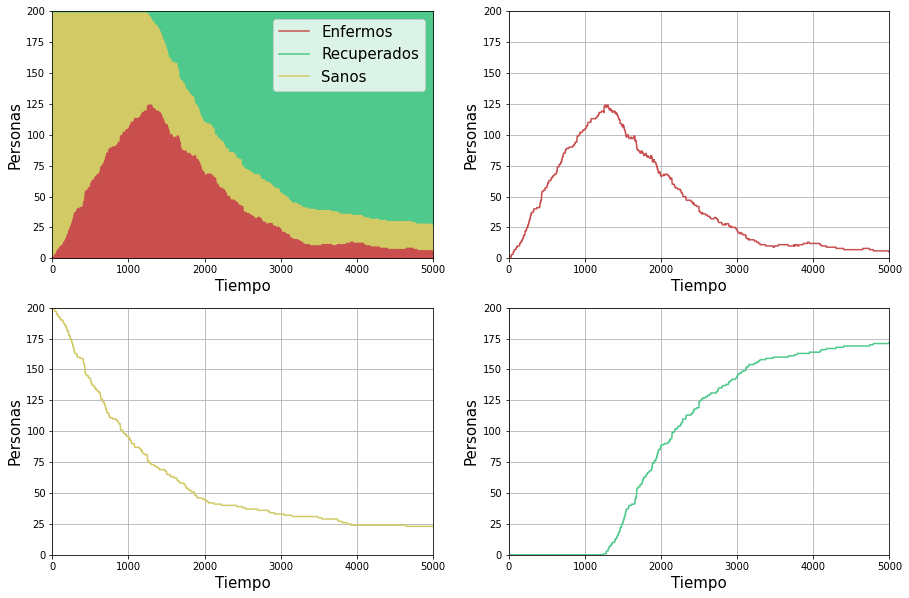

In [0]:
class Humans():
    def __init__(self,x,y,vx,vy,sick):
        self.X=x
        self.Y=y
        self.Vx=vx
        self.Vy=vy
        self.Sick=sick
        self.Time=[]
        self.Ims=[]
        self.Imr=[]
        self.Dgsa=[]
    #Evolucion de la posicion de los humanos
    def Pos_evol(self,t):
        self.X=self.X +self.Vx*t
        self.Y=self.Y +self.Vy*t
    #Cambio en la direccion de la velocidad en las paredes 
    def Vel_evol(self):
        if self.X<=-100 or self.X>=100 :
            self.Vx= -self.Vx
        if self.Y<=-100 or self.Y>=100 :
            self.Vy= -self.Vy
    def Sicks(self):
        if len(self.Ims)==0 and self.Sick==True:
            self.Ims.append(1)
    
    def Recovery(self):
        if len(self.Imr)==0 and self.Sick==False:
            self.Imr.append(1)
    
    #SickToHealth
    def STH(self):
        if self.Sick==True :
            self.Time.append(1)
            if len(self.Time)==rec_time :
                self.Sick=False
                self.Dgsa.append("I don't get sick again!")
    
        
#Creacion de humanos

H=[] #Lista con los humanos,las entradas son instancias de la clase.
H0=Humans(random.uniform(-100,100),random.uniform(-100,100),random.uniform(-5,5),random.uniform(-5,5),True) #Humano infectado el H0
H.append(H0)
for i in range(199):
    Hn=Humans(random.uniform(-100,100),random.uniform(-100,100),random.uniform(-5,5),random.uniform(-5,5),False)
    H.append(Hn)

#Datos a recopilar en la simulacion
Sicks=[] #Numero de humanos enfermos
Healthy=[] #Humanos que no se han enfermado
Recovery=[] #Humanos que se recuperan de la enfermedad

#Evolucion de la enfermedad en un año
time=[]
a=0 #Contador de enfermos
b=0 #Contador de recuperados
X0=[]
Y0=[]
X1=[]
Y1=[]
for j in range(5000):
    c=0 #CONTADOR DE PERSONAS SANAS
    time.append(j)
    
    for i in range(len(H)):
        k=i+1 #Contador de los humanos
        #Bucle para infectar a los humanos
        while k <=(len(H)-1):
            #Primer Cuadrante
            if H[i].X >= 0 and H[i].Y>=0 and j<=1249:
                if (H[i].Sick==True and H[k].Sick==False and H[k].X >= 0 and H[k].Y>=0 and (rad_infc>= np.sqrt((H[k].X -H[i].X)**2 + (H[k].Y -H[i].Y)**2 ))): #Radio de infeccion
                    H[k].Sick=True
            #Cuarto cuadrante
            if H[i].X >= 0 and H[i].Y<=0 and j>=1250 and j<= 2499:
                if (H[i].Sick==True and H[k].Sick==False and H[k].X >= 0 and H[k].Y<=0 and (rad_infc>= np.sqrt((H[k].X -H[i].X)**2 + (H[k].Y -H[i].Y)**2 ))): #Radio de infeccion
                    H[k].Sick=True
            #Tercer cuadrante
            if H[i].X <= 0 and H[i].Y<=0 and j>=2500 and j<=3749:
                if (H[i].Sick==True and H[k].Sick==False  and H[k].X <= 0 and H[k].Y<=0 and (rad_infc>= np.sqrt((H[k].X -H[i].X)**2 + (H[k].Y -H[i].Y)**2 ))): #Radio de infeccion
                    H[k].Sick=True
            #Segundo cuadrante
            if H[i].X <= 0 and H[i].Y>=0 and j>=3750 and j<= 5000:
                if (H[i].Sick==True and H[k].Sick==False and H[k].X <= 0 and H[k].Y>=0 and (rad_infc>= np.sqrt((H[k].X -H[i].X)**2 + (H[k].Y -H[i].Y)**2 ))): #Radio de infeccion
                    H[k].Sick=True
            k=k+1
        #Evolucion delas posicion y velocidades
        
        
        H[i].Pos_evol(0.1)
        H[i].Vel_evol()
        H[i].STH()
        #Comienzo de evaluacion del estado de cada humano
        if H[i].Sick==True and len(H[i].Ims)==0 :
            a=a+1
            H[i].Sicks()
        if H[i].Sick==False and len(H[i].Dgsa)==1 and len(H[i].Imr)==0 :
            a=a-1  #Restarle uno a el numero de enfermos
            b=b+1  #Aumentar en una unidad las persoans recuperadas
            H[i].Recovery()
        if H[i].Sick==False and len(H[i].Dgsa)==0:
            c=c+1
       
    Sicks.append(a)
    Recovery.append(b)
    Healthy.append(c)
    ##Termina la evaluacion de Enfermos,Recuperados y Sanos por dia.

##Graficas
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,10))
plt.setp(axes, xlim=(0,5000), ylim=(0,200))
axes[0,0].set_facecolor('#D1CA65')

#Combinadas
axes[0,0].plot(time,Sicks,'#C94F4F',label="Enfermos")
axes[0,0].plot(time,200-np.array(Recovery),'#4FC98C', label="Recuperados")
axes[0,0].plot(202,200,'#D1CA65',label="Sanos" )
axes[0,0].fill_between(time,Sicks,color='#C94F4F')
axes[0,0].fill_between(time,200-np.array(Recovery), np.max(200-np.array(Recovery)), color='#4FC98C')
axes[0,0].set_ylabel('Personas',fontsize = 15.0)
axes[0,0].set_xlabel('Tiempo',fontsize = 15.0)
axes[0,0].legend(fontsize = 15.0)

axes[0,1].plot(time,Sicks,'#C94F4F') #Infectados 
axes[0,1].set_ylabel('Personas',fontsize = 15.0)
axes[0,1].set_xlabel('Tiempo',fontsize = 15.0)
axes[0,1].grid()

axes[1,0].plot(time,Healthy,'#D1CA65') #Sanos
axes[1,0].set_ylabel('Personas',fontsize = 15.0)
axes[1,0].set_xlabel('Tiempo',fontsize = 15.0)
axes[1,0].grid()

axes[1,1].plot(time,Recovery,'#4FC98C') #Recuperados
axes[1,1].set_ylabel('Personas',fontsize = 15.0)
axes[1,1].set_xlabel('Tiempo',fontsize = 15.0)
axes[1,1].grid()

plt.savefig('2.png')
plt.show()

#Caso 3. Aislamiento social 1 (3/4 de la población en casa)

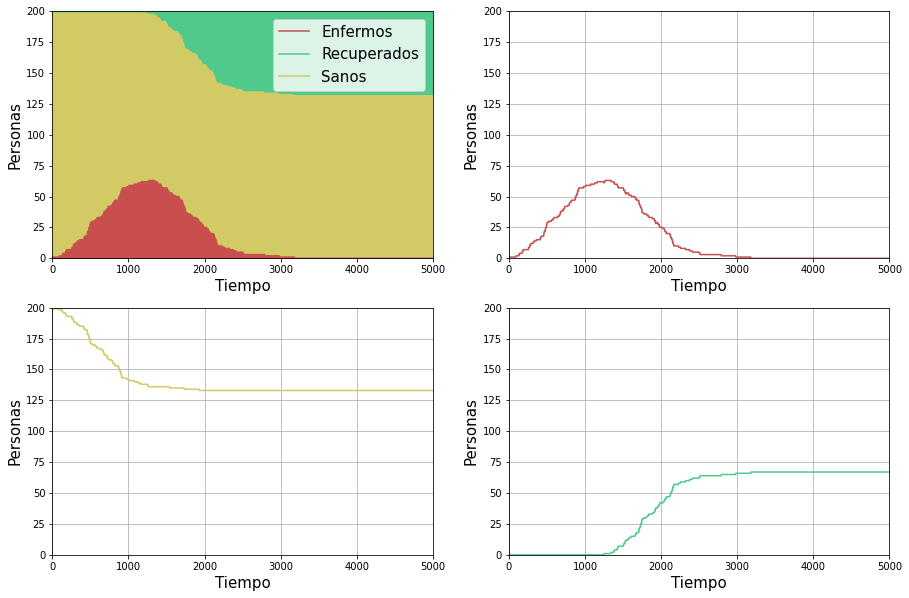

In [0]:
class Humans():
    def __init__(self,x,y,vx,vy,sick):
        self.X=x
        self.Y=y
        self.Vx=vx
        self.Vy=vy
        self.Sick=sick
        self.Time=[]
        self.Ims=[]
        self.Imr=[]
        self.Dgsa=[]
    #Evolucion de la posicion de los humanos
    def Pos_evol(self,t):
        self.X=self.X +self.Vx*t
        self.Y=self.Y +self.Vy*t
    #Cambio en la direccion de la velocidad en las paredes 
    def Vel_evol(self):
        if self.X<=-100 or self.X>=100 :
            self.Vx= -self.Vx
        if self.Y<=-100 or self.Y>=100 :
            self.Vy= -self.Vy
    def Sicks(self):
        if len(self.Ims)==0 and self.Sick==True:
            self.Ims.append(1)
    
    def Recovery(self):
        if len(self.Imr)==0 and self.Sick==False:
            self.Imr.append(1)
    
    #SickToHealth
    def STH(self):
        if self.Sick==True :
            self.Time.append(1)
            if len(self.Time)==rec_time :
                self.Sick=False
                self.Dgsa.append("I don't get sick again!")
    
        
#Creacion de humanos

H=[] #Lista con los humanos,las entradas son instancias de la clase.
H0=Humans(random.uniform(-100,100),random.uniform(-100,100),random.uniform(-5,5),random.uniform(-5,5),True) #Humano infectado el H0
H.append(H0)


for i in range(150):
    Hn=Humans(random.uniform(-100,100),random.uniform(-100,100),0,0,False)
    H.append(Hn)

for i in range(49):
    Hn=Humans(random.uniform(-100,100),random.uniform(-100,100),random.uniform(-5,5),random.uniform(-5,5),False)
    H.append(Hn)

#Datos a recopilar en la simulacion
Sicks=[] #Numero de humanos enfermos
Healthy=[] #Humanos que no se han enfermado
Recovery=[] #Humanos que se recuperan de la enfermedad

#Evolucion de la enfermedad en un año
time=[]
a=0 #Contador de enfermos
b=0 #Contador de recuperados
X0=[]
Y0=[]
X1=[]
Y1=[]
for j in range(5000):
    c=0 #CONTADOR DE PERSONAS SANAS
    time.append(j)
    
    for i in range(len(H)):
        k=i+1 #Contador de los humanos
        #Bucle para infectar a los humanos
        while k <=(len(H)-1):
            if (H[i].Sick==True and H[k].Sick==False and (rad_infc>= np.sqrt((H[k].X -H[i].X)**2 + (H[k].Y -H[i].Y)**2 ))): #Radio de infeccion
                H[k].Sick=True
            k=k+1
        #Evolucion delas posicion y velocidades
        
        
        H[i].Pos_evol(0.1)
        H[i].Vel_evol()
        H[i].STH()
        #Comienzo de evaluacion del estado de cada humano
        if H[i].Sick==True and len(H[i].Ims)==0 :
            a=a+1
            H[i].Sicks()
        if H[i].Sick==False and len(H[i].Dgsa)==1 and len(H[i].Imr)==0 :
            a=a-1  #Restarle uno a el numero de enfermos
            b=b+1  #Aumentar en una unidad las persoans recuperadas
            H[i].Recovery()
        if H[i].Sick==False and len(H[i].Dgsa)==0:
            c=c+1
       
    Sicks.append(a)
    Recovery.append(b)
    Healthy.append(c)
    ##Termina la evaluacion de Enfermos,Recuperados y Sanos por dia.

##Graficas
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,10))
plt.setp(axes, xlim=(0,5000), ylim=(0,200))
axes[0,0].set_facecolor('#D1CA65')

#Combinadas
axes[0,0].plot(time,Sicks,'#C94F4F',label="Enfermos")
axes[0,0].plot(time,200-np.array(Recovery),'#4FC98C', label="Recuperados")
axes[0,0].plot(202,200,'#D1CA65',label="Sanos" )
axes[0,0].fill_between(time,Sicks,color='#C94F4F')
axes[0,0].fill_between(time,200-np.array(Recovery), np.max(200-np.array(Recovery)), color='#4FC98C')
axes[0,0].set_ylabel('Personas',fontsize = 15.0)
axes[0,0].set_xlabel('Tiempo',fontsize = 15.0)
axes[0,0].legend(fontsize = 15.0)

axes[0,1].plot(time,Sicks,'#C94F4F') #Infectados 
axes[0,1].set_ylabel('Personas',fontsize = 15.0)
axes[0,1].set_xlabel('Tiempo',fontsize = 15.0)
axes[0,1].grid()

axes[1,0].plot(time,Healthy,'#D1CA65') #Sanos
axes[1,0].set_ylabel('Personas',fontsize = 15.0)
axes[1,0].set_xlabel('Tiempo',fontsize = 15.0)
axes[1,0].grid()

axes[1,1].plot(time,Recovery,'#4FC98C') #Recuperados
axes[1,1].set_ylabel('Personas',fontsize = 15.0)
axes[1,1].set_xlabel('Tiempo',fontsize = 15.0)
axes[1,1].grid()


plt.savefig('3.png')
plt.show()

#Caso 4. Aislamiento social 2 (7/8 de la población en casa)

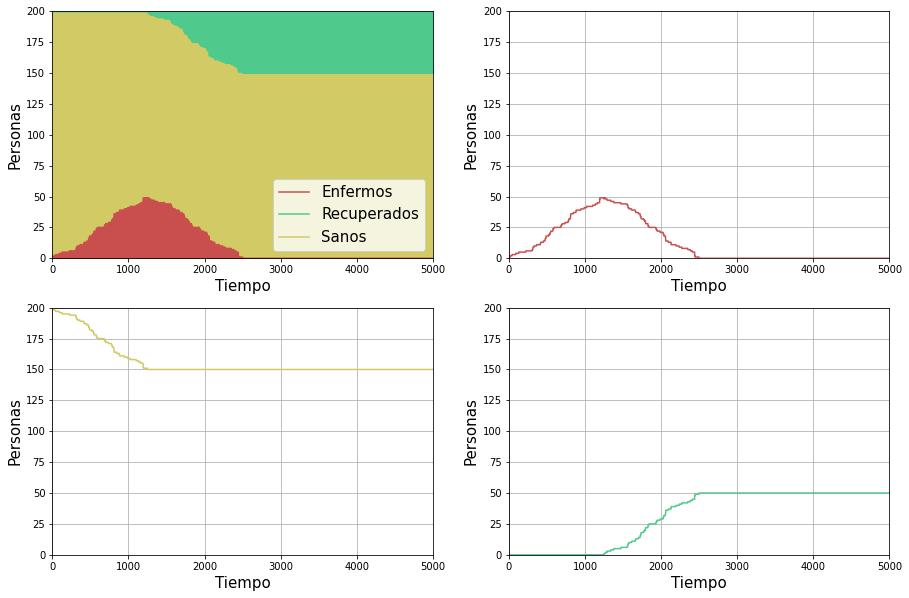

In [0]:
class Humans():
    def __init__(self,x,y,vx,vy,sick):
        self.X=x
        self.Y=y
        self.Vx=vx
        self.Vy=vy
        self.Sick=sick
        self.Time=[]
        self.Ims=[]
        self.Imr=[]
        self.Dgsa=[]
    #Evolucion de la posicion de los humanos
    def Pos_evol(self,t):
        self.X=self.X +self.Vx*t
        self.Y=self.Y +self.Vy*t
    #Cambio en la direccion de la velocidad en las paredes 
    def Vel_evol(self):
        if self.X<=-100 or self.X>=100 :
            self.Vx= -self.Vx
        if self.Y<=-100 or self.Y>=100 :
            self.Vy= -self.Vy
    def Sicks(self):
        if len(self.Ims)==0 and self.Sick==True:
            self.Ims.append(1)
    
    def Recovery(self):
        if len(self.Imr)==0 and self.Sick==False:
            self.Imr.append(1)
    
    #SickToHealth
    def STH(self):
        if self.Sick==True :
            self.Time.append(1)
            if len(self.Time)==rec_time :
                self.Sick=False
                self.Dgsa.append("I don't get sick again!")
    
        
#Creacion de humanos

H=[] #Lista con los humanos,las entradas son instancias de la clase.
H0=Humans(random.uniform(-100,100),random.uniform(-100,100),random.uniform(-5,5),random.uniform(-5,5),True) #Humano infectado el H0
H.append(H0)


for i in range(175):
    Hn=Humans(random.uniform(-100,100),random.uniform(-100,100),0,0,False)
    H.append(Hn)

for i in range(24):
    Hn=Humans(random.uniform(-100,100),random.uniform(-100,100),random.uniform(-5,5),random.uniform(-5,5),False)
    H.append(Hn)

#Datos a recopilar en la simulacion
Sicks=[] #Numero de humanos enfermos
Healthy=[] #Humanos que no se han enfermado
Recovery=[] #Humanos que se recuperan de la enfermedad

#Evolucion de la enfermedad en un año
time=[]
a=0 #Contador de enfermos
b=0 #Contador de recuperados
X0=[]
Y0=[]
X1=[]
Y1=[]
for j in range(5000):
    c=0 #CONTADOR DE PERSONAS SANAS
    time.append(j)
    
    for i in range(len(H)):
        k=i+1 #Contador de los humanos
        #Bucle para infectar a los humanos
        while k <=(len(H)-1):
            if (H[i].Sick==True and H[k].Sick==False and (rad_infc>= np.sqrt((H[k].X -H[i].X)**2 + (H[k].Y -H[i].Y)**2 ))): #Radio de infeccion
                H[k].Sick=True
            k=k+1
        #Evolucion delas posicion y velocidades
        
        
        H[i].Pos_evol(0.1)
        H[i].Vel_evol()
        H[i].STH()
        #Comienzo de evaluacion del estado de cada humano
        if H[i].Sick==True and len(H[i].Ims)==0 :
            a=a+1
            H[i].Sicks()
        if H[i].Sick==False and len(H[i].Dgsa)==1 and len(H[i].Imr)==0 :
            a=a-1  #Restarle uno a el numero de enfermos
            b=b+1  #Aumentar en una unidad las persoans recuperadas
            H[i].Recovery()
        if H[i].Sick==False and len(H[i].Dgsa)==0:
            c=c+1
       
    Sicks.append(a)
    Recovery.append(b)
    Healthy.append(c)
    ##Termina la evaluacion de Enfermos,Recuperados y Sanos por dia.

##Graficas
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,10))
plt.setp(axes, xlim=(0,5000), ylim=(0,200))
axes[0,0].set_facecolor('#D1CA65')

#Combinadas
axes[0,0].plot(time,Sicks,'#C94F4F',label="Enfermos")
axes[0,0].plot(time,200-np.array(Recovery),'#4FC98C', label="Recuperados")
axes[0,0].plot(202,200,'#D1CA65',label="Sanos" )
axes[0,0].fill_between(time,Sicks,color='#C94F4F')
axes[0,0].fill_between(time,200-np.array(Recovery), np.max(200-np.array(Recovery)), color='#4FC98C')
axes[0,0].set_ylabel('Personas',fontsize = 15.0)
axes[0,0].set_xlabel('Tiempo',fontsize = 15.0)
axes[0,0].legend(fontsize = 15.0)

axes[0,1].plot(time,Sicks,'#C94F4F') #Infectados 
axes[0,1].set_ylabel('Personas',fontsize = 15.0)
axes[0,1].set_xlabel('Tiempo',fontsize = 15.0)
axes[0,1].grid()

axes[1,0].plot(time,Healthy,'#D1CA65') #Sanos
axes[1,0].set_ylabel('Personas',fontsize = 15.0)
axes[1,0].set_xlabel('Tiempo',fontsize = 15.0)
axes[1,0].grid()

axes[1,1].plot(time,Recovery,'#4FC98C') #Recuperados
axes[1,1].set_ylabel('Personas',fontsize = 15.0)
axes[1,1].set_xlabel('Tiempo',fontsize = 15.0)
axes[1,1].grid()

plt.savefig('4.png')
plt.show()